**Introduction:**

Stellar classification is crucial in astronomy for understanding celestial objects. By analyzing spectral characteristics, astronomers can categorize stars, galaxies, and quasars, deepening our understanding of the universe. This project utilizes artificial neural networks (ANN) to predict celestial objects based on a dataset comprising 100,000 observations from the Sloan Digital Sky Survey (SDSS), each described by 17 features and classified as stars, galaxies, or quasars.


**Objectives:**

1. Utilize artificial neural networks to predict celestial objects based on spectral characteristics.
2. Explore patterns and insights within the dataset to enhance our understanding of celestial objects.
3. Evaluate the performance of the ANN model in accurately classifying celestial objects.
4. Provide visualizations and interpretations.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data=pd.read_csv("/content/star_classification.csv")
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [ ]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
data['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

**Exploratory Data Analysis**

In [ ]:
sns.countplot(data=data,x='class',hue='class')
plt.title("Frequency of Different Object Classes (Galaxy, Star, or Quasar)")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

NameError: name 'sns' is not defined

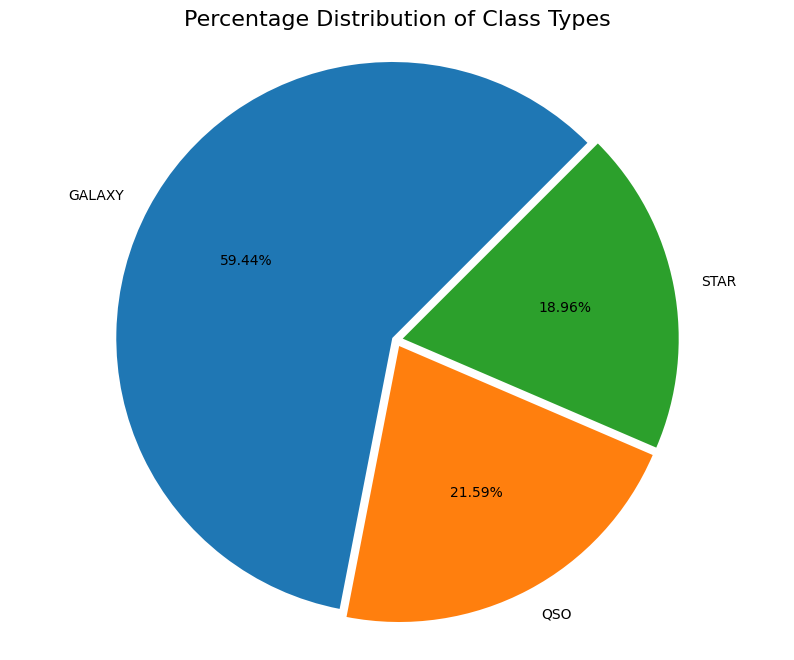

In [ ]:
class_counts=data['class'].value_counts()
classes=data['class'].unique()
explode=(0.015, 0.025, 0.025)
plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=classes,autopct = '%1.2f%%',
        startangle = 45, explode = explode)
plt.title('Percentage Distribution of Class Types', fontsize = 16)
plt.axis('equal')
plt.show()

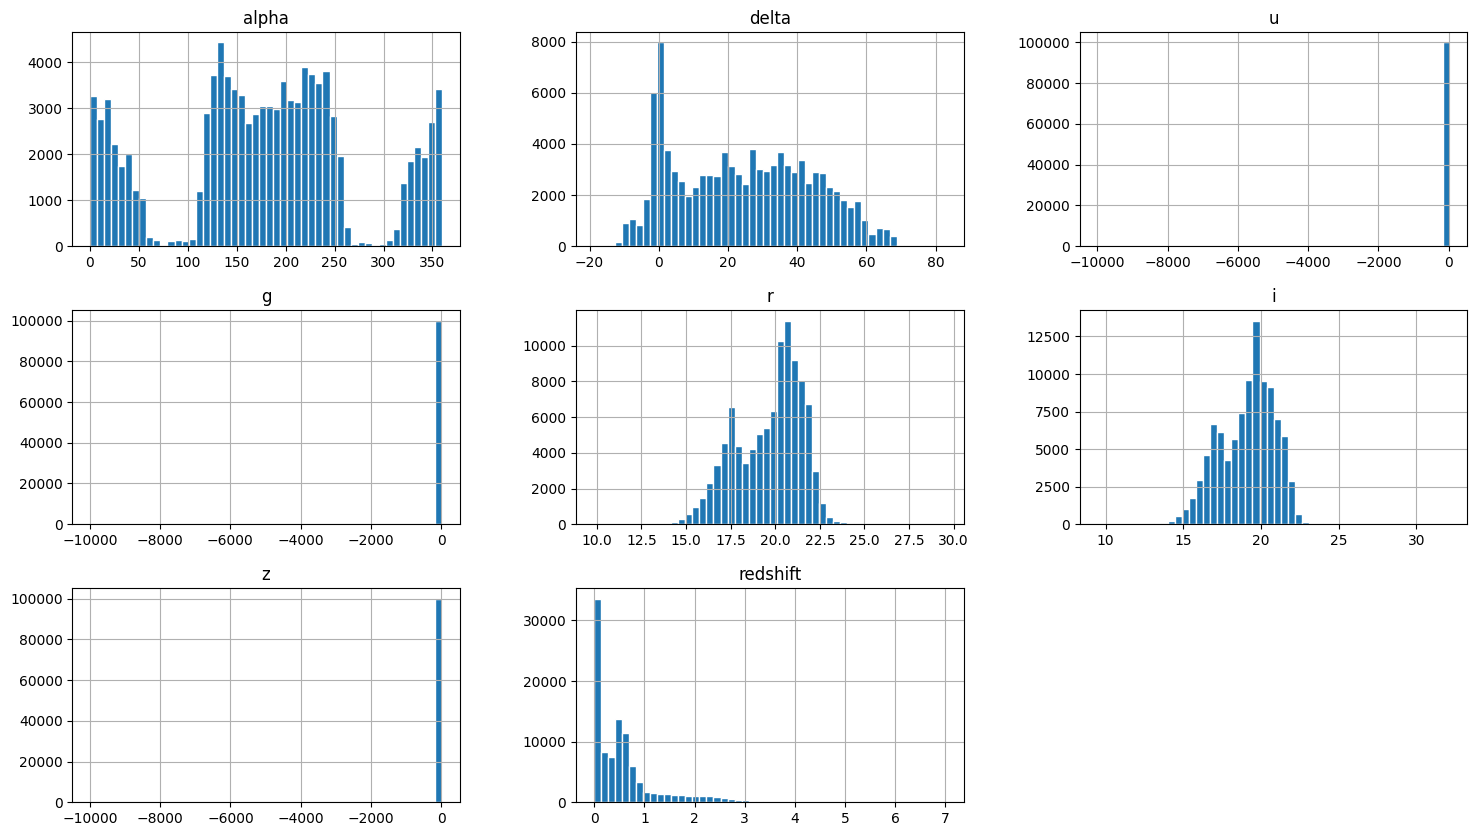

In [ ]:
columns_to_drop = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'fiber_ID', 'plate', 'MJD']
df = data.drop(columns_to_drop, axis = 1)
df.hist(bins =50, figsize = (18,10), edgecolor = 'white')
plt.show()

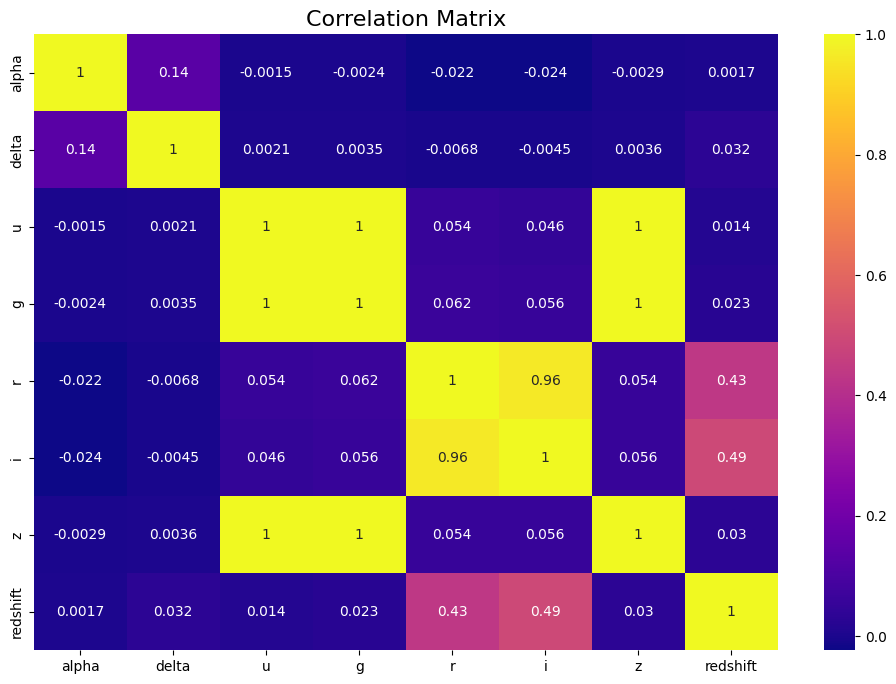

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.title('Correlation Matrix', fontsize = 16)
plt.show()

**Data Preprocessing**

In [ ]:
LE = LabelEncoder()
data['class'] = LE.fit_transform(data['class'])
data['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

In [ ]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [ ]:
X= data.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID', 'spec_obj_ID', 'MJD', 'class'], axis = 1)
y = data['class']

In [ ]:
sm = SMOTE(random_state = 30, k_neighbors = 5)
X, y = sm.fit_resample(X, y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.3 , random_state=0)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (124834, 7)
X_test (53501, 7)
y_train (124834,)
y_test (53501,)


In [ ]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
model =  keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(16, activation="selu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="selu"),
    layers.Dropout(0.2),
    layers.Dense(3, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                256       
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 32)                544       
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 3)                

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    callbacks=[early_stopping], validation_split=0.3)

Epoch 1/50
5462/5462 [==============================] - 28s 5ms/step - loss: 0.2187 - accuracy: 0.9257 - val_loss: 0.1197 - val_accuracy: 0.9650
Epoch 2/50
5462/5462 [==============================] - 25s 5ms/step - loss: 0.1401 - accuracy: 0.9574 - val_loss: 0.1058 - val_accuracy: 0.9696
Epoch 3/50
5462/5462 [==============================] - 25s 5ms/step - loss: 0.1328 - accuracy: 0.9596 - val_loss: 0.1070 - val_accuracy: 0.9679
Epoch 4/50
5462/5462 [==============================] - 27s 5ms/step - loss: 0.1625 - accuracy: 0.9628 - val_loss: 0.1137 - val_accuracy: 0.9638
Epoch 5/50
5462/5462 [==============================] - 26s 5ms/step - loss: 0.1201 - accuracy: 0.9642 - val_loss: 0.1042 - val_accuracy: 0.9707
Epoch 6/50
5462/5462 [==============================] - 25s 5ms/step - loss: 0.1201 - accuracy: 0.9638 - val_loss: 0.0956 - val_accuracy: 0.9715
Epoch 7/50
5462/5462 [==============================] - 27s 5ms/step - loss: 0.1171 - accuracy: 0.9643 - val_loss: 0.0969 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

1672/1672 [==============================] - 4s 2ms/step - loss: 0.1136 - accuracy: 0.9645
Test accuracy: 0.9645053148269653


In [ ]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class)

1672/1672 [==============================] - 3s 2ms/step
[2 0 2 ... 0 1 1]


In [ ]:
class_report = classification_report(y_test, y_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     17807
           1       0.98      0.95      0.97     17924
           2       0.96      1.00      0.98     17770

    accuracy                           0.96     53501
   macro avg       0.96      0.96      0.96     53501
weighted avg       0.96      0.96      0.96     53501



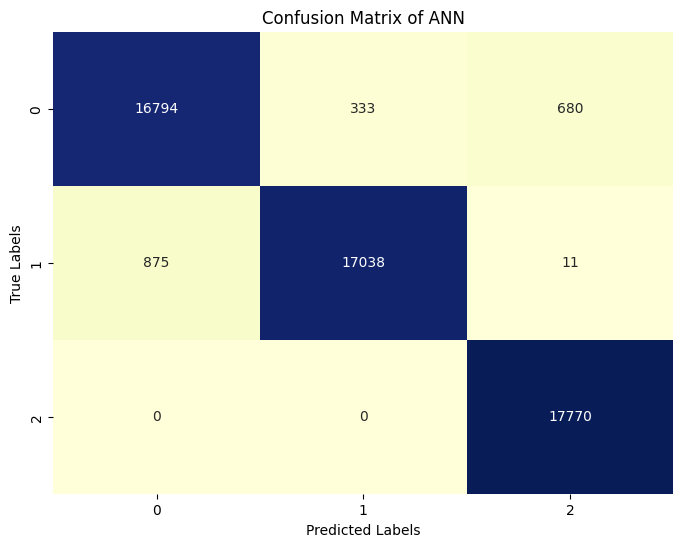

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of ANN')
plt.show()